# Unemployment Analysis with Python  
### Data Science Internship – OASIS INFOBYTE  
### By: Nanda Kumar


Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


Load Dataset

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Understand the Data

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [26]:
df.columns = df.columns.str.strip()
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Region.1': 'Area'
}, inplace=True)
df.drop(columns=['longitude', 'latitude'], inplace=True, errors='ignore')

Data Cleaning

In [25]:
df.isnull().sum()
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

Unemployment Rate Over Time (KEY GRAPH)

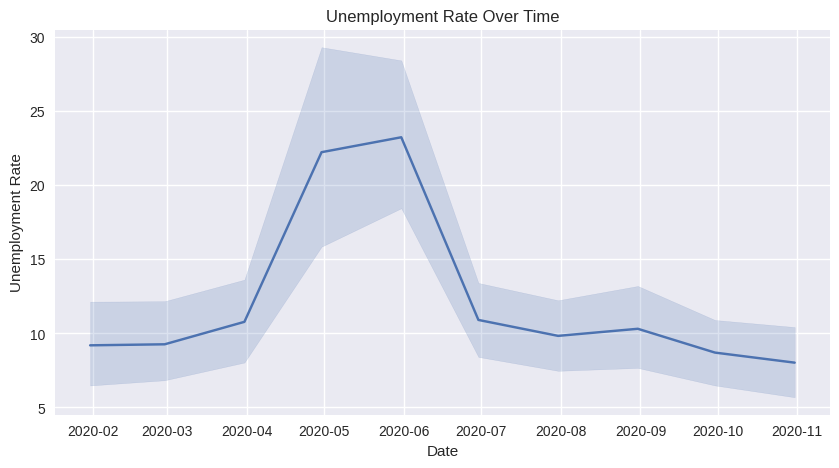

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

Region-wise comparison

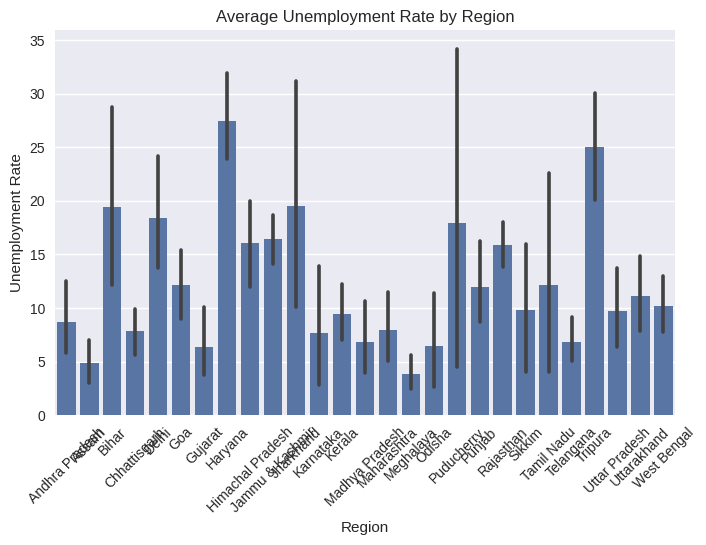

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Region',
    y='Unemployment Rate',
    estimator=np.mean
)
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.show()


HeatMap

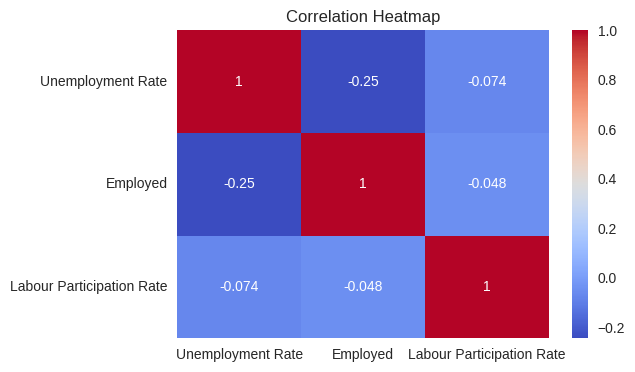

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['Unemployment Rate', 'Employed', 'Labour Participation Rate']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

State-wise Top Unemployment

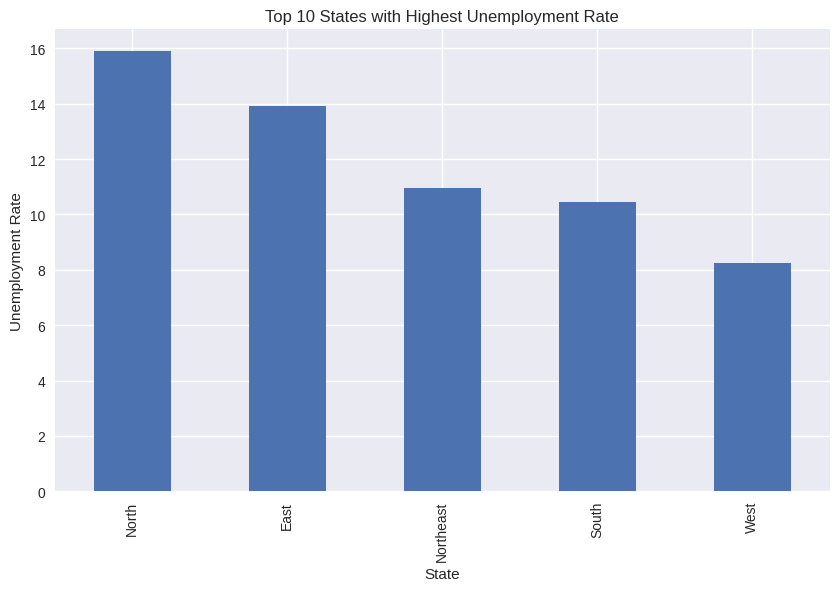

In [20]:
state_unemp = df.groupby('Area')['Unemployment Rate'] \
                .mean() \
                .sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_unemp.head(10).plot(kind='bar')
plt.title('Top 10 States with Highest Unemployment Rate')
plt.ylabel('Unemployment Rate')
plt.xlabel('State')
plt.show()

## Conclusion
- Unemployment rates vary significantly across regions and states
- Certain regions consistently show higher unemployment levels
- Data visualization helps in understanding employment trends effectively

This analysis demonstrates how Python can be used for real-world data
analysis and decision-making.
